Write a function that generates a choropleth map with 5 classes using the population attribute #4

In [54]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [55]:
!pip install geopandas

In [56]:
pip install mapclassify

In [57]:
import folium
import json
import requests
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import mapclassify

In [58]:
plt.style.use('ggplot')

Read the polygon and point data and store them into a dataframe

In [59]:
#Load your data
poly = "C:\\Users\\Dell 5401\\Documents\\GMT 320\\Assignments\\python-mapfactory\\country_boundaries_v2.json"
point = "C:\\Users\\Dell 5401\\Documents\\GMT 320\\Assignments\\python-mapfactory\\Poinst.geojson"

# DF
polys = gpd.read_file(poly)
points = gpd.read_file(point)

Make sure both dataframes are in the same projection system

In [60]:
polys = polys.to_crs(epsg = 4326)
points = polys.to_crs(epsg = 4326)

Leverage GeoPandas Spatial Join to join the layers with intersection:

In [61]:
joined_df = gpd.sjoin(
    points,
    polys,
    how='inner',
    op='intersects',
)

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [62]:
joined_df.head(2)

,SOVEREIGNT_left,TYPE_left,ADMIN_left,NAME_left,NAME_LONG_left,FORMAL_EN_left,POP_EST_left,POP_RANK_left,ECONOMY_left,INCOME_GRP_left,...,FORMAL_EN_right,POP_EST_right,POP_RANK_right,ECONOMY_right,INCOME_GRP_right,CONTINENT_right,SUBREGION_right,REGION_WB_right,LABEL_X_right,LABEL_Y_right
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,...,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,...,Republic of Mozambique,30366036.0,15,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,37.837890,-13.943230


Then let’s GroupBy SOVEREIGNT and use the unique id from the point data and rename the column

In [63]:
city_count_country = joined_df.groupby(
    ['SOVEREIGNT_left'], 
    as_index=False,
)['NAME_left'].count()

city_count_country.columns = ['SOVEREIGNT', 'city_Count']  # rename the column

Merge this datafram to the original polygon dataframe

In [64]:
new = polys.merge(
    city_count_country, 
    on='SOVEREIGNT', 
    how='left', 
) 

Plot the dataframe with a function

<AxesSubplot:title={'center':'Add Map Title'}>

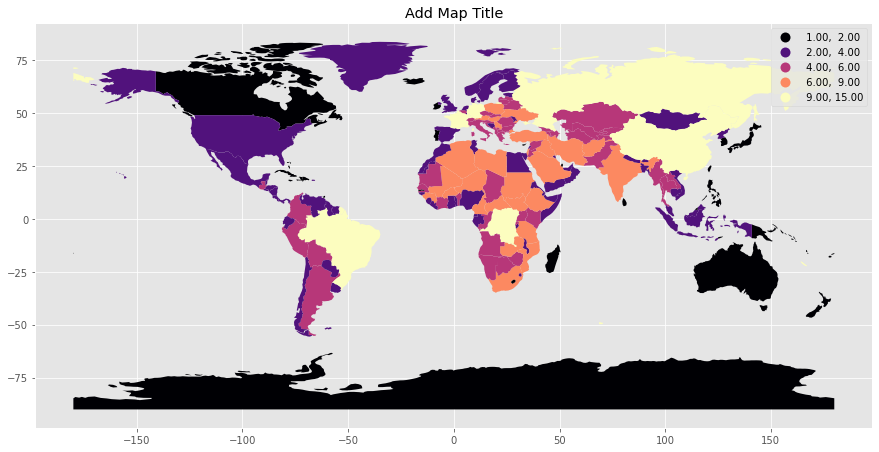

In [68]:
#Specify the map properties
Map_Title = "Add Map Title"
column = "city_Count"
num_classes = 5
Scema = 'natural_breaks' #equal_interval, natural_breaks, Percentiles, quantiles

#Function to create the map
def quantile(col, k, Title, s):
    map = new .plot(column= col, scheme = s, figsize=(15, 10), cmap='magma', legend=True, k = num_classes)
    map.set_title(Title)
    return map

#Calling the function
quantile(column, num_classes, Map_Title, Scema)